In [1]:
import pandas as pd
import numpy as np

In [2]:
ta = pd.read_csv(r'D:\IMARTICUS\Trip_advisor_review.csv')

In [3]:
ta.head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


In [4]:
ta.shape

(20491, 2)

In [5]:
ta.isnull().sum()


Review    0
Rating    0
dtype: int64

In [6]:
ta.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [7]:
ta.Rating.replace({1:0 , 2:0 , 3:1 , 4:2 , 5:2} , inplace=True)

In [8]:
ta['Review'] = ta['Review'].str.lower()

In [9]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [10]:
from sklearn.feature_extraction.text import CountVectorizer 

In [11]:
def text_process(mess):          
    """                                                        
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in ENGLISH_STOP_WORDS]


In [12]:
bow_transformer = CountVectorizer(analyzer=text_process).fit_transform(ta['Review'])

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(bow_transformer , ta.Rating)

In [14]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

In [15]:
NB.fit(x_train , y_train)

MultinomialNB()

In [16]:
pred_test = NB.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
conmat_NB = confusion_matrix(y_test , pred_test)
conmat_NB

array([[ 547,    8,  261],
       [  69,   14,  447],
       [  41,   18, 3718]], dtype=int64)

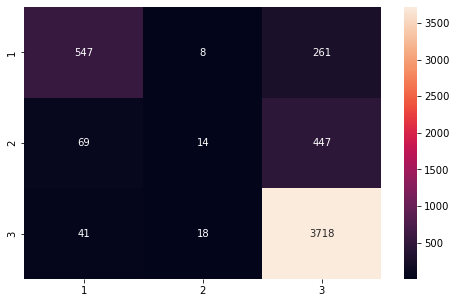

In [45]:
plt.figure(figsize = (8,5))
sns.heatmap(conmat_NB, annot = True, fmt="d",
            xticklabels=['1', '2', '3'],
            yticklabels=['1', '2', '3']);

In [18]:
conmat_NB.diagonal().sum() / conmat_NB.sum() * 100   ## finding accuracy manually

83.52527815732968

In [19]:
accuracy_score(y_test, pred_test)*100

83.52527815732968

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth= 4)

In [21]:
DT.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
pred_test_DT = DT.predict(x_test)
pred_test_DT

array([2, 2, 2, ..., 2, 0, 2], dtype=int64)

In [23]:
pred_test_DT.shape

(5123,)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
conmat_DT = confusion_matrix(y_test , pred_test_DT)
conmat_DT

array([[ 199,    0,  617],
       [  40,    0,  490],
       [  51,    0, 3726]], dtype=int64)

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

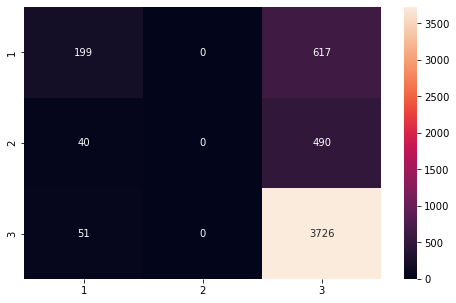

In [42]:
plt.figure(figsize = (8, 5))
sns.heatmap(conmat_DT, annot = True, fmt="d",
            xticklabels=['1', '2', '3'],
            yticklabels=['1', '2', '3']);

In [43]:
accuracy_DT = accuracy_score(y_test , pred_test_DT)*100
accuracy_DT

76.61526449346087

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [36]:
RF.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
pred_test_RF = RF.predict(x_test)
pred_test_RF

array([2, 2, 2, ..., 2, 0, 2], dtype=int64)

In [38]:
conmat_RF = confusion_matrix(y_test, pred_test_RF)
conmat_RF

array([[ 238,    0,  578],
       [  11,    1,  518],
       [   3,    0, 3774]], dtype=int64)

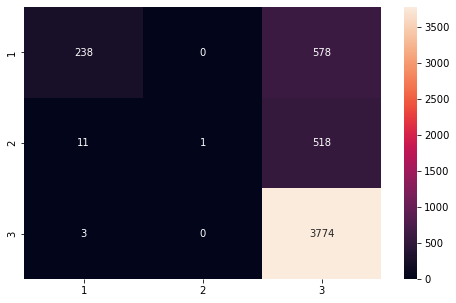

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(conmat_RF, annot=True, fmt="d",
            xticklabels=['1', '2', '3'],
            yticklabels=['1', '2', '3']); 

In [44]:
accuracy_RF = accuracy_score(y_test , pred_test_RF)*100
accuracy_RF

78.33300800312317

## WordCloud

In [26]:
from wordcloud import WordCloud

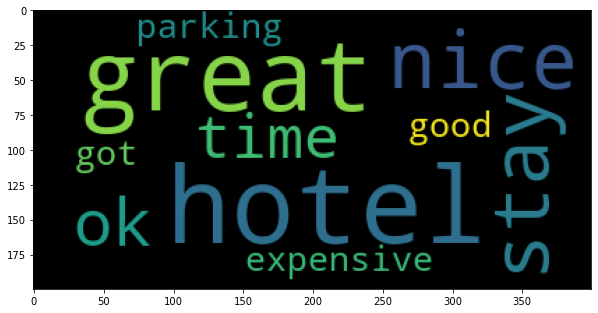

In [28]:
cloud = WordCloud(stopwords= ENGLISH_STOP_WORDS, max_words=10).generate(str(ta.Review))
plt.figure( figsize = (10,10))
plt.imshow(cloud)

As we know that, Naive Bayes is best suited for NLP problems, same thing can be confirmed from this model as well. 

Apart from Naive Bayes, I have also used Decision Tree & Random Forest to build the model, but as seen Naive Bayes is giving the best performance out of all.